# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [366]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [367]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [368]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

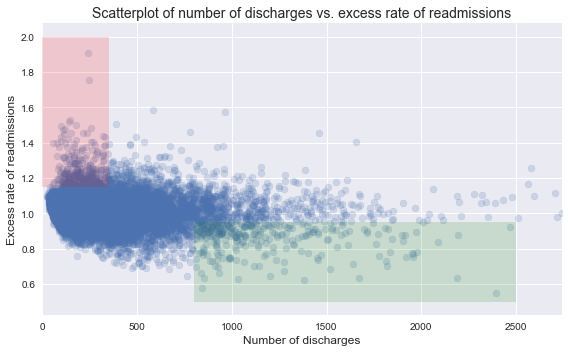

In [369]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [370]:
# Your turn
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

In [371]:
clean_hospital_read_df

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,CA,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15642,WAGONER COMMUNITY HOSPITAL,370166,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15648,ST LUKE'S HOSPITAL AT THE VINTAGE,670075,TX,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15652,SOUTH TEXAS SURGICAL HOSPITAL,670061,TX,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15396,GEORGE L MEE MEMORIAL HOSPITAL,50189,CA,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [372]:
def fit_OLS(losses, treshold, **kwargs):
    
    if ('cat' in kwargs) and ('cont' in kwargs):
        dummy_var = pd.get_dummies(kwargs['cat'])
        all_var = pd.concat([dummy_var, kwargs['cont']], axis=1)
    elif 'cat' in kwargs:
        all_var = pd.get_dummies(kwargs['cat'])
    else:
        all_var = kwargs['cont']
        
    all_var = sm.add_constant(all_var, has_constant='add')
    ols_model = sm.OLS(losses, all_var)
    result = ols_model.fit()
    result.pvalues.sort_values().index
    df_result = pd.DataFrame(index=result.pvalues.sort_values().index,
                             data=result.pvalues.sort_values(),
                             columns=['p_value'])
    df_result = df_result[df_result.p_value <= treshold]
    
    loss_pred = result.predict(all_var)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x=losses, y=loss_pred)
    ax.set_ybound(upper = loss_pred.max())
    ax.set_xbound(upper = losses.max())
    ax.set_title("Predicted vs. Actual losses")

    return (result.summary(), df_result, loss_pred, fig)

In [373]:
xedges = [0, 100, 1000, float('inf')]
yedges = [0, 0.9, 1.2, float('inf')]

x = clean_hospital_read_df['Number of Discharges'][81:-3]
y = clean_hospital_read_df['Excess Readmission Ratio'][81:-3]

H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
H = H.T  # Let each row list bins with common y range.

In [374]:
sum(sum(H))

11494.0

In [375]:
clean_hospital_read_df['Number of Discharges'][81:-3].size

11494

In [376]:
H

array([[  1.00000000e+00,   9.27000000e+02,   1.10000000e+02],
       [  1.17500000e+03,   8.63900000e+03,   3.41000000e+02],
       [  1.20000000e+01,   2.79000000e+02,   1.00000000e+01]])

In [377]:
chi_s, p_val, dof, expctd = stats.chi2_contingency(H)

In [378]:
chi_s, p_val, dof, expctd

(259.19574033137656,
 6.7966704843724633e-55,
 4,
 array([[  107.28588829,   889.08212981,    41.6319819 ],
        [ 1049.60327127,  8698.10118323,   407.2955455 ],
        [   31.11084044,   257.81668697,    12.07247259]]))

In [379]:
# Chi-square value at 99% confidence interval is less than the computed chi-square statistic,
# hence we can reject the null hypothesis that the excess readmission rates is not correlated
# with hospital discharges

stats.chi2.ppf(0.99, dof)

13.276704135987622

                               OLS Regression Results                               
Dep. Variable:     Excess Readmission Ratio   R-squared:                       0.009
Model:                                  OLS   Adj. R-squared:                  0.009
Method:                       Least Squares   F-statistic:                     100.5
Date:                      Tue, 18 Apr 2017   Prob (F-statistic):           1.50e-23
Time:                              20:51:20   Log-Likelihood:                 11177.
No. Observations:                     11494   AIC:                        -2.235e+04
Df Residuals:                         11492   BIC:                        -2.233e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------

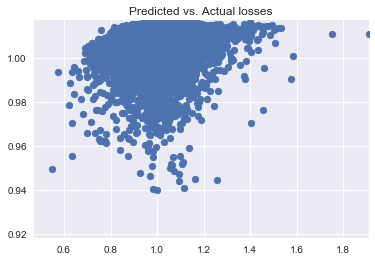

In [380]:
# Run all variables through OLS, identify variables with significance > threshold

y_var = clean_hospital_read_df['Excess Readmission Ratio'][81:-3]
x_var = clean_hospital_read_df['Number of Discharges'][81:-3]

summary_results, sig_variables, loss_pred, scatter_plot = fit_OLS(losses=y_var,
                                         cont=x_var,
                                         treshold=0.05)

# Print summary results and significant variables
print summary_results
print sig_variables

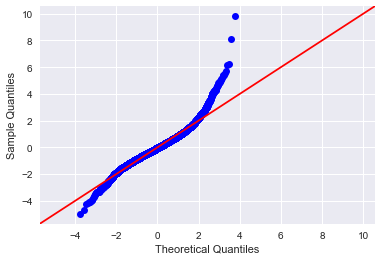

In [381]:
fig = sm.qqplot(y_var, fit=True, line='45')
fig.show()

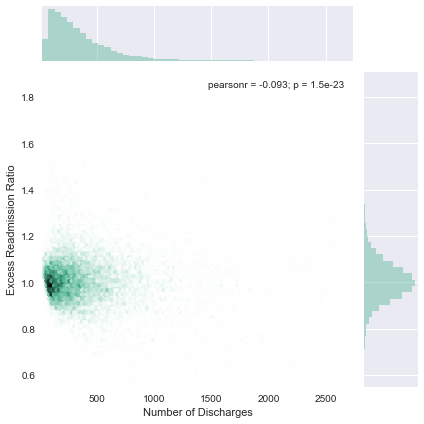

In [382]:
sns.jointplot(x_var, y_var, kind="hex", color="#4CB391")

# Conclusions

1. Excess rate of re-admissions is correlated to number of discharges in a signiicant way. We can see this through 2 tests: a pearson chi-square test of a contigency table segmenting results by number of discharges (we an reject the null hypothesis that discharges does not have an effect at the 99% confidence level) and a linear regression analysis.

2. However, the effect of hospital discharges is very week. We can see this through the R2 of the regression analysis which shows that less than 1% of the variance in excess rate of re-admissions can be explained by hospital discharges and visually through a joint plot that accounts for the density of observations as well as their location in the scatter plot.